In [4]:
pip install xgboost

# **Importing Libraries**

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# **DATASET DOWNLOAD**

In [6]:
df = pd.read_csv('cubic_zirconia.csv')

# **Understanding and Cleaning the Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


No null values anywhere, that's good

In [8]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

Unnamed seems useless

In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x 10 columns]

In [10]:
df.describe()

carat         depth         table             x             y  \
count  26967.000000  26270.000000  26967.000000  26967.000000  26967.000000   
mean       0.798375     61.745147     57.456080      5.729854      5.733569   
std        0.477745      1.412860      2.232068      1.128516      1.166058   
min        0.200000     50.800000     49.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.710000   
50%        0.700000     61.800000     57.000000      5.690000      5.710000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        4.500000     73.600000     79.000000     10.230000     58.900000   

                  z         price  
count  26967.000000  26967.000000  
mean       3.538057   3939.518115  
std        0.720624   4024.864666  
min        0.000000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2375.000000  
75%        4.040000   5360.000000  
max       31.800000  18818.000000

can't have 0 values in x, y and z, removing them

In [11]:
#counting such values
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].count()

carat      9
cut        9
color      9
clarity    9
depth      9
table      9
x          9
y          9
z          9
price      9
dtype: int64

In [12]:
#removing such values
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]

In [13]:
df.describe()

carat         depth         table             x             y  \
count  26958.000000  26261.000000  26958.000000  26958.000000  26958.000000   
mean       0.798190     61.745345     57.455342      5.730105      5.733832   
std        0.477602      1.412395      2.231227      1.126714      1.164342   
min        0.200000     50.800000     49.000000      3.730000      3.710000   
25%        0.400000     61.000000     56.000000      4.710000      4.712500   
50%        0.700000     61.800000     57.000000      5.690000      5.700000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        4.500000     73.600000     79.000000     10.230000     58.900000   

                  z         price  
count  26958.000000  26958.000000  
mean       3.539238   3938.311262  
std        0.717838   4023.359737  
min        1.070000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2375.000000  
75%        4.040000   5358.000000  
max       31.800000  18818.000000

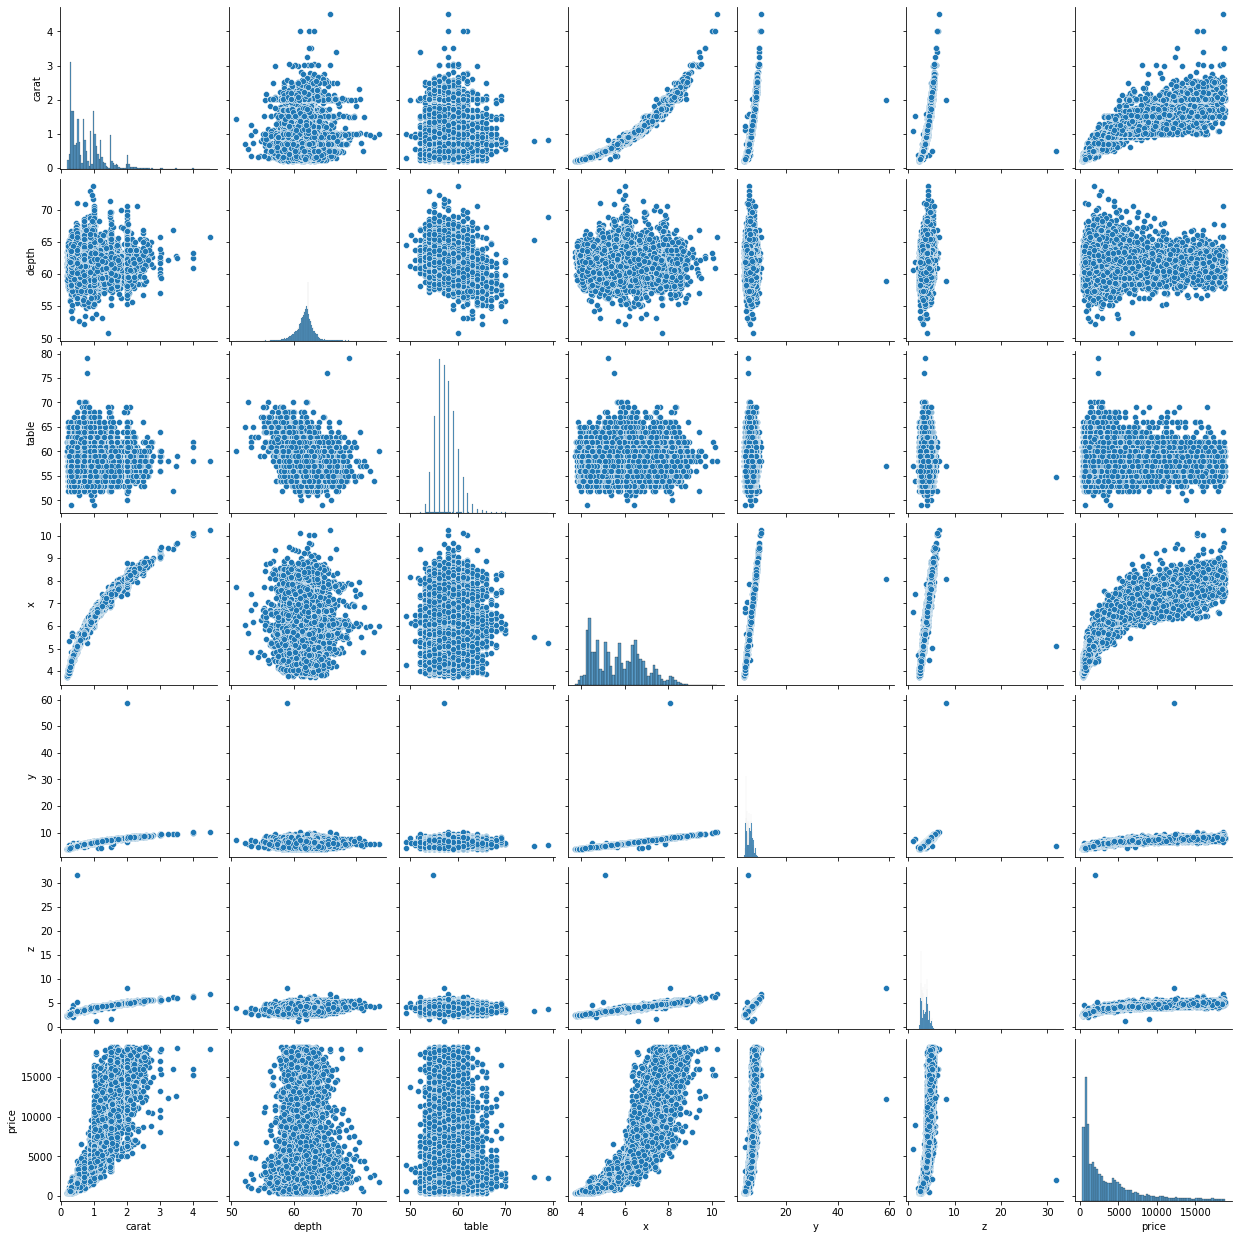

In [14]:
sns.pairplot(df)

Clearly there are some outliers spotting them:
1. y: <=50
2. z: >=2 <=30
3. table: >50 & <=70
4. depth: >52 & <=70

rest looks fine, will rectify if something comes up later

In [15]:
#further cleaning
df = df[(df['y'] <=50) & (df['z'] <=30) & (df['z'] >=2) & (df['table'] <=70) & (df['table'] >50) & (df['depth'] <=70) & (df['depth'] >=52)]

In [16]:
df.describe()

carat         depth         table             x             y  \
count  26242.000000  26242.000000  26242.000000  26242.000000  26242.000000   
mean       0.797511     61.741376     57.454439      5.728944      5.730937   
std        0.476891      1.396149      2.221899      1.125533      1.117417   
min        0.200000     52.200000     50.100000      3.730000      3.710000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.690000      5.700000   
75%        1.050000     62.500000     59.000000      6.540000      6.540000   
max        4.500000     70.000000     70.000000     10.230000     10.160000   

                  z         price  
count  26242.000000  26242.000000  
mean       3.537474   3935.714008  
std        0.695437   4019.861354  
min        2.060000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2373.000000  
75%        4.040000   5357.500000  
max        6.720000  18818.000000

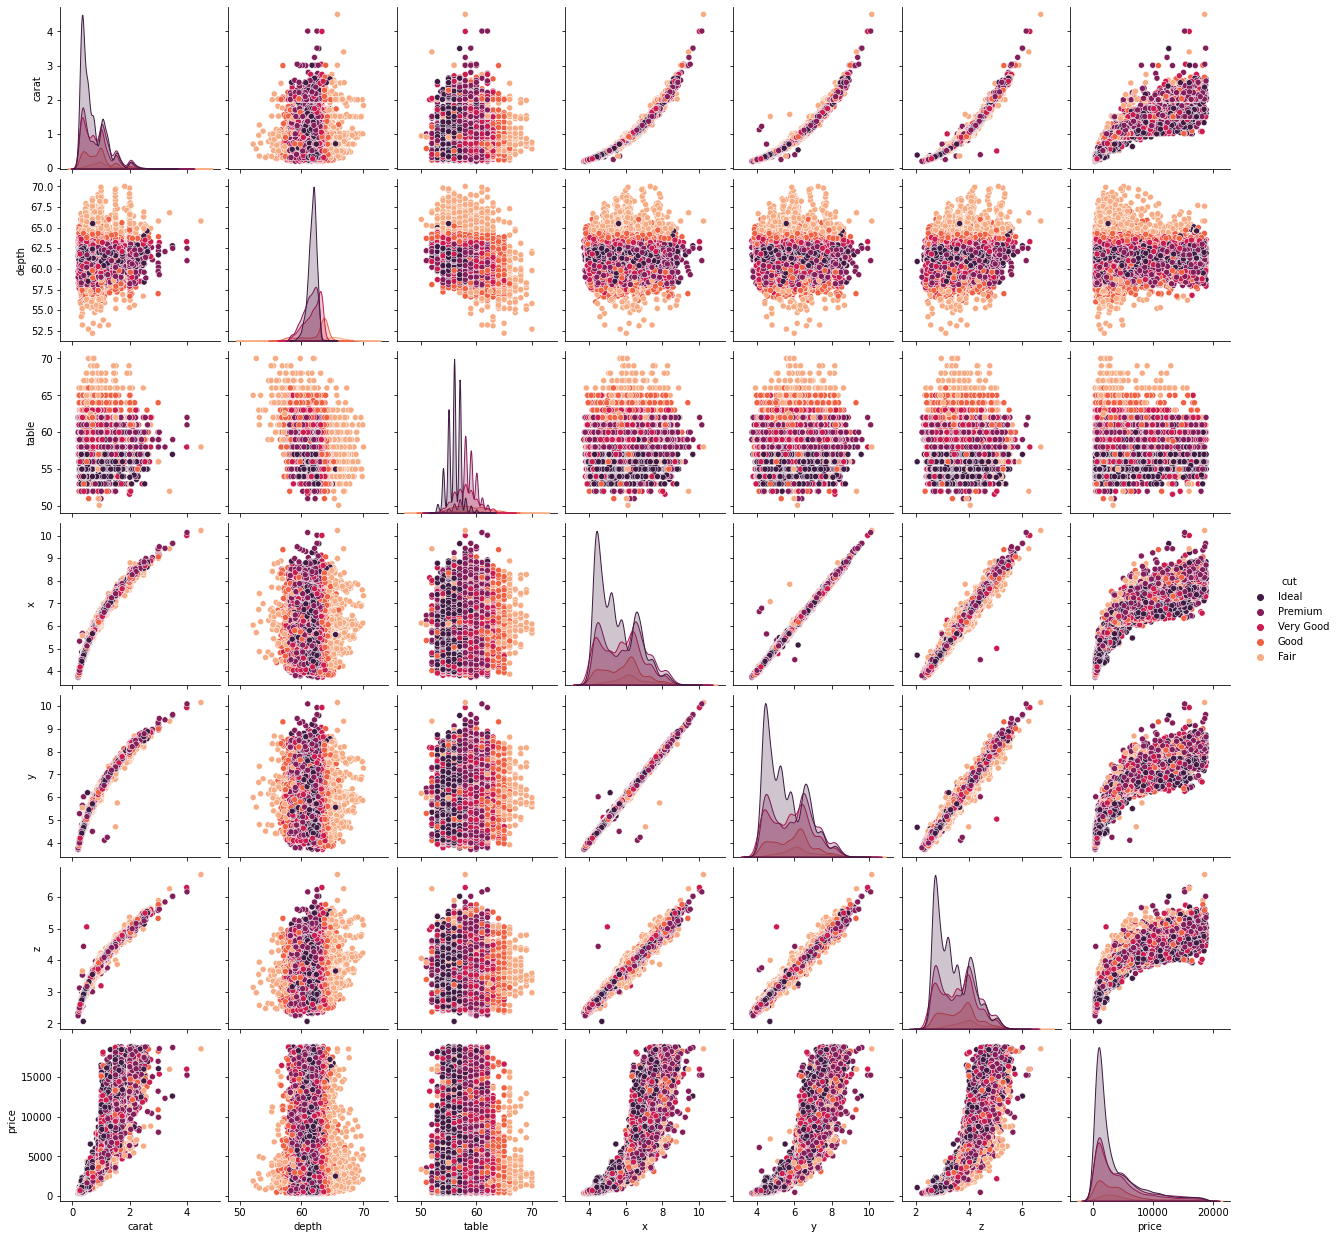

In [17]:
sns.pairplot(df, hue = 'cut', palette = 'rocket')

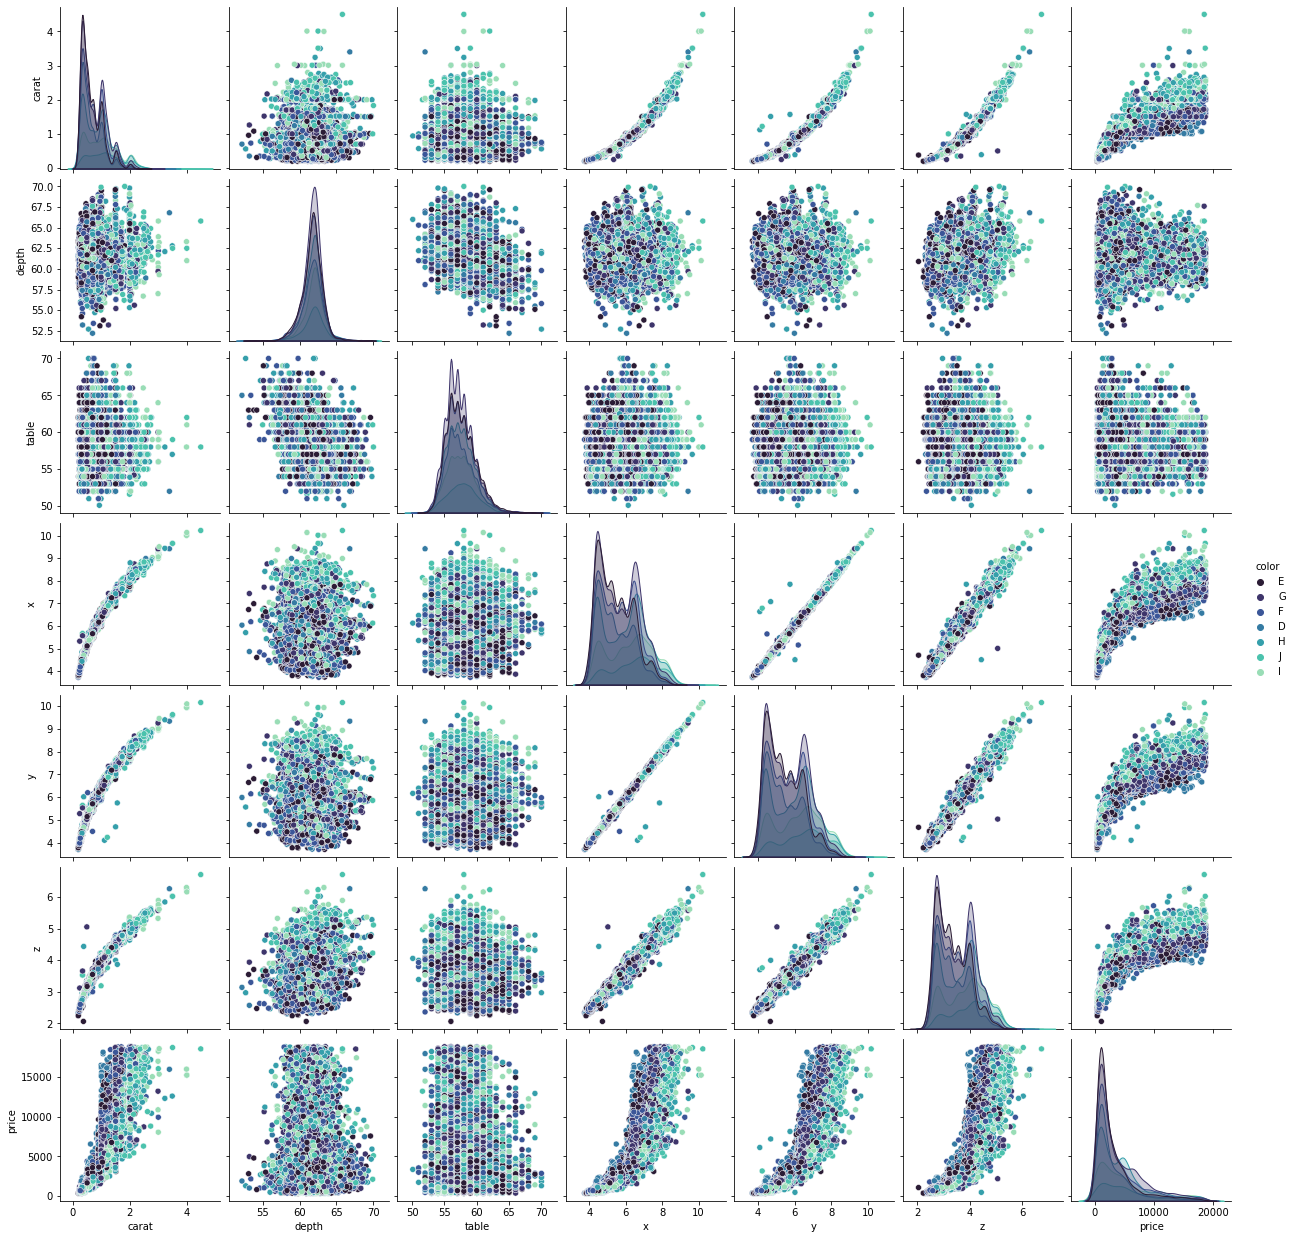

In [18]:
sns.pairplot(df, hue = 'color', palette = 'mako')

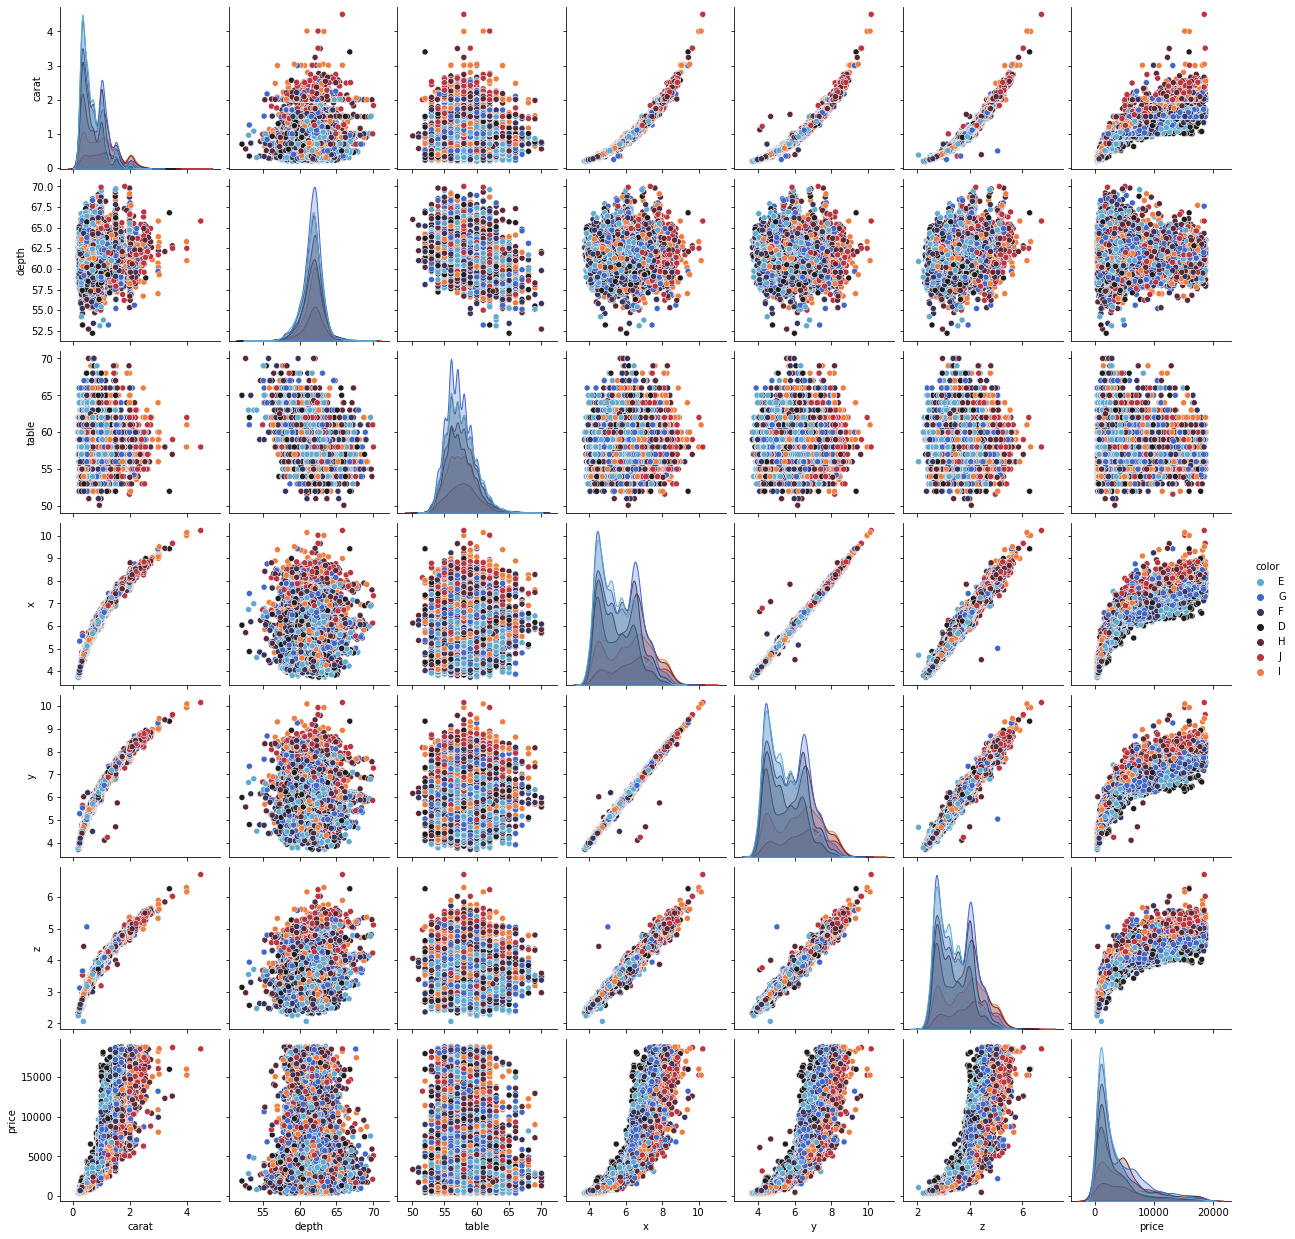

In [19]:
sns.pairplot(df, hue = 'color', palette = 'icefire')

Maybe a couple of more points to clear out, have to check with Regression line

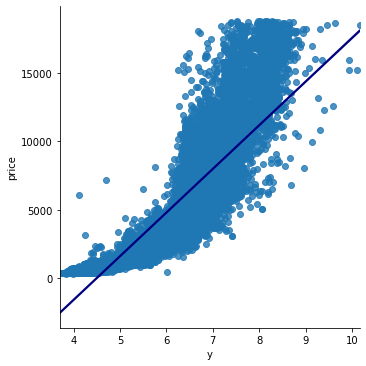

In [20]:
sns.lmplot(x = 'y', y = 'price', data = df, line_kws={'color': 'navy'})

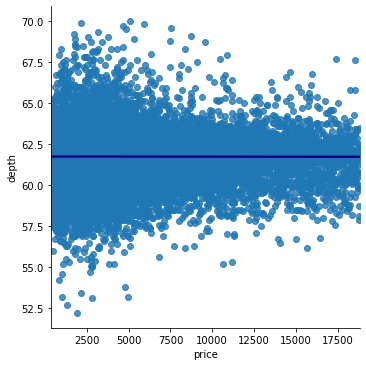

In [21]:
sns.lmplot(x = 'price', y = 'depth', data = df, line_kws = {'color':'navy'})

**Note:** Price sufficiently independent of depth, will eliminate it from final prediction model

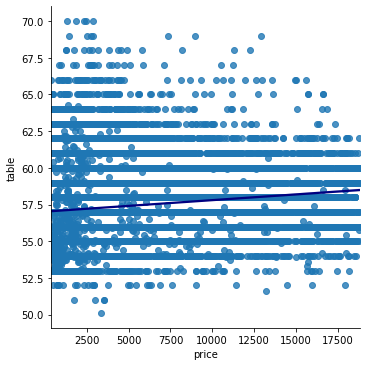

In [22]:
sns.lmplot(x = 'price', y = 'table', data = df, fit_reg=True, robust = True, line_kws = {'color':'navy'})

Both depth and table look fine, outliers adequately removed

# **Tackling with the categorical data**

**Price vs Cut**

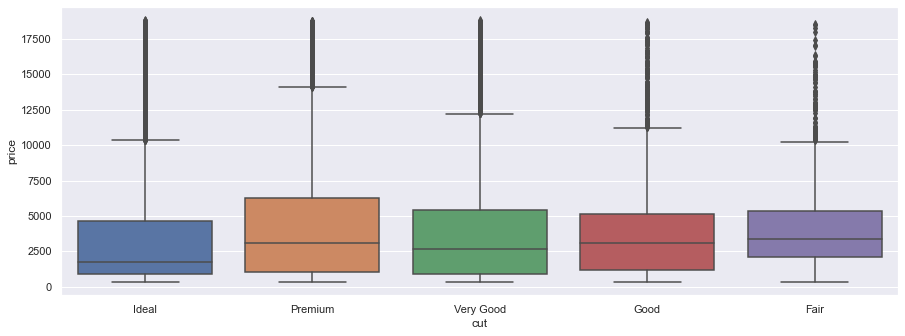

In [25]:
sns.boxplot(x='cut', y='price', data = df)
sns.set(rc={'figure.figsize':(15.0,5.3)})

**Price vs color**

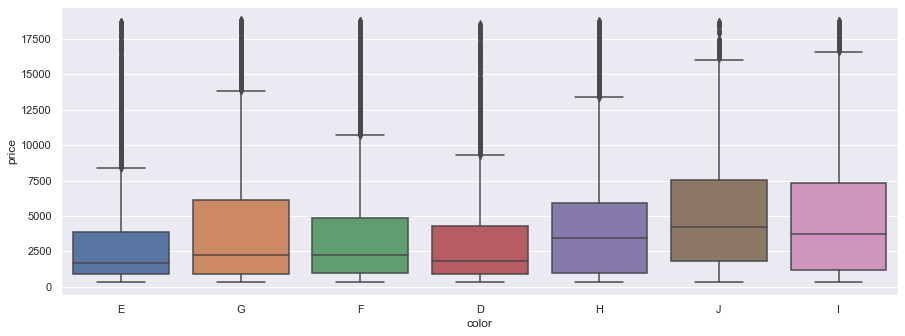

In [26]:
sns.boxplot(x='color', y='price', data = df)
sns.set(rc={'figure.figsize':(15.0,5.3)})


**Price vs Clarity**

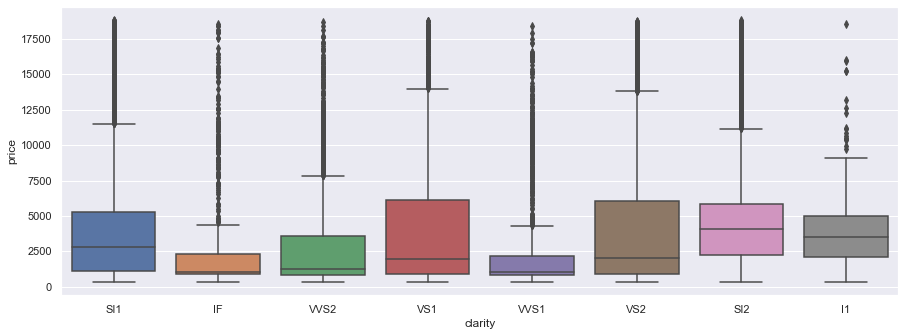

In [27]:
sns.boxplot(x='clarity', y='price', data = df)
sns.set(rc={'figure.figsize':(15.0,6.3)})

# **Label Encoding of Object Datasets (Cut, Clarity, Color)**

In [28]:
df_copy = df.copy()

In [29]:
lbl_enc = LabelEncoder()

In [30]:
#categorical variables:
cat_obj = ['cut', 'color', 'clarity']

In [31]:
for col in cat_obj:
    df_copy[col] = lbl_enc.fit_transform(df_copy[col])
    
df_copy.head()

carat  cut  color  clarity  depth  table     x     y     z  price
0   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66    499
1   0.33    3      3        1   60.8   58.0  4.42  4.46  2.70    984
2   0.90    4      1        7   62.2   60.0  6.04  6.12  3.78   6289
3   0.42    2      2        4   61.6   56.0  4.82  4.80  2.96   1082
4   0.31    2      2        6   60.4   59.0  4.35  4.43  2.65    779

In [32]:
df_copy.describe()

carat           cut         color       clarity         depth  \
count  26242.000000  26242.000000  26242.000000  26242.000000  26242.000000   
mean       0.797511      2.556208      2.601212      3.835798     61.741376   
std        0.476891      1.022471      1.704915      1.725840      1.396149   
min        0.200000      0.000000      0.000000      0.000000     52.200000   
25%        0.400000      2.000000      1.000000      2.000000     61.000000   
50%        0.700000      2.000000      3.000000      4.000000     61.800000   
75%        1.050000      3.000000      4.000000      5.000000     62.500000   
max        4.500000      4.000000      6.000000      7.000000     70.000000   

              table             x             y             z         price  
count  26242.000000  26242.000000  26242.000000  26242.000000  26242.000000  
mean      57.454439      5.728944      5.730937      3.537474   3935.714008  
std        2.221899      1.125533      1.117417      0.695437   4019.861354  
min       50.100000      3.730000      3.710000      2.060000    326.000000  
25%       56.000000      4.710000      4.720000      2.900000    945.000000  
50%       57.000000      5.690000      5.700000      3.520000   2373.000000  
75%       59.000000      6.540000      6.540000      4.040000   5357.500000  
max       70.000000     10.230000     10.160000      6.720000  18818.000000

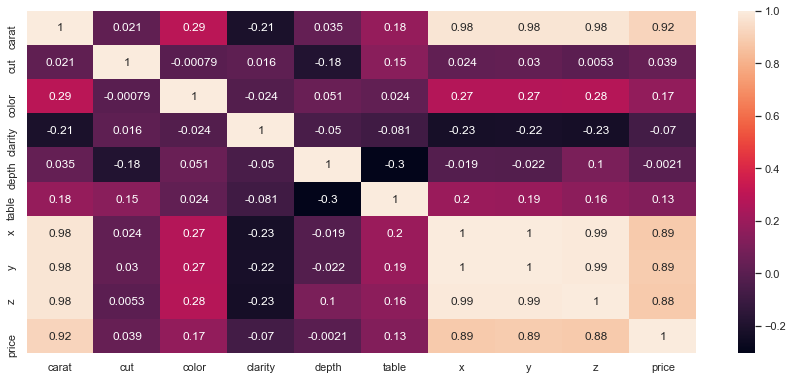

In [33]:
cormat = df_copy.corr()
sns.heatmap(cormat, annot = True)
sns.set(rc={'figure.figsize':(15.0,10.0)})

**Important points:**
1. 'x', 'y', 'z' show high correlation with 'price'
2. 'cut', 'depth', 'table' show low correlation (as expected with 'table' and 'depth'
3. even 'color' has low correlation but not as low as the above three

# **Building the Model**

In [34]:
X= df_copy.drop(["price"],axis =1)
y= df_copy["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=7)

In [35]:
#Pipeline Building

p_lr=Pipeline([("scalar1",StandardScaler()), ("lr_classifier",LinearRegression())])

p_dt=Pipeline([("scalar2",StandardScaler()), ("dt_classifier",DecisionTreeRegressor())])

p_rf=Pipeline([("scalar3",StandardScaler()), ("rf_classifier",RandomForestRegressor())])


p_kn=Pipeline([("scalar4",StandardScaler()), ("rf_classifier",KNeighborsRegressor())])


p_xgb=Pipeline([("scalar5",StandardScaler()), ("rf_classifier",XGBRegressor())])

In [36]:
#pipeline list
pipelines = [p_lr, p_dt, p_rf, p_kn, p_xgb]

p_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

In [37]:
#fitting the pipelines

for p in pipelines:
    p.fit(X_train, y_train)

In [38]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (p_dict[i], cv_score.mean()))

LinearRegression: -1330.666373 
DecisionTree: -789.607194 
RandomForest: -566.488138 
KNeighbors: -873.511575 
XGBRegressor: -556.559793 


**XGBRegressor:** Best negative rmse score, hence let's proceed with it

In [39]:
#now model prediction on test data
pred = p_xgb.predict(X_test)

In [96]:
#Evaluating our XGBRegressor model
print("Root mean squared score (r2):",metrics.r2_score(y_test, pred))
print("Adjusted r2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root mean squared score (r2): 0.9794021332431555
Adjusted r2: 0.9793667484749151
Mean Absolute Error: 299.44946774529785
Mean Squared Error: 339945.2211185506
RMSE: 583.0482150890701


**And that's it! Thank You for sitcking around till the end.**